In [1]:
!pip install pandas matplotlib seaborn

zsh:1: command not found: pip


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts       

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


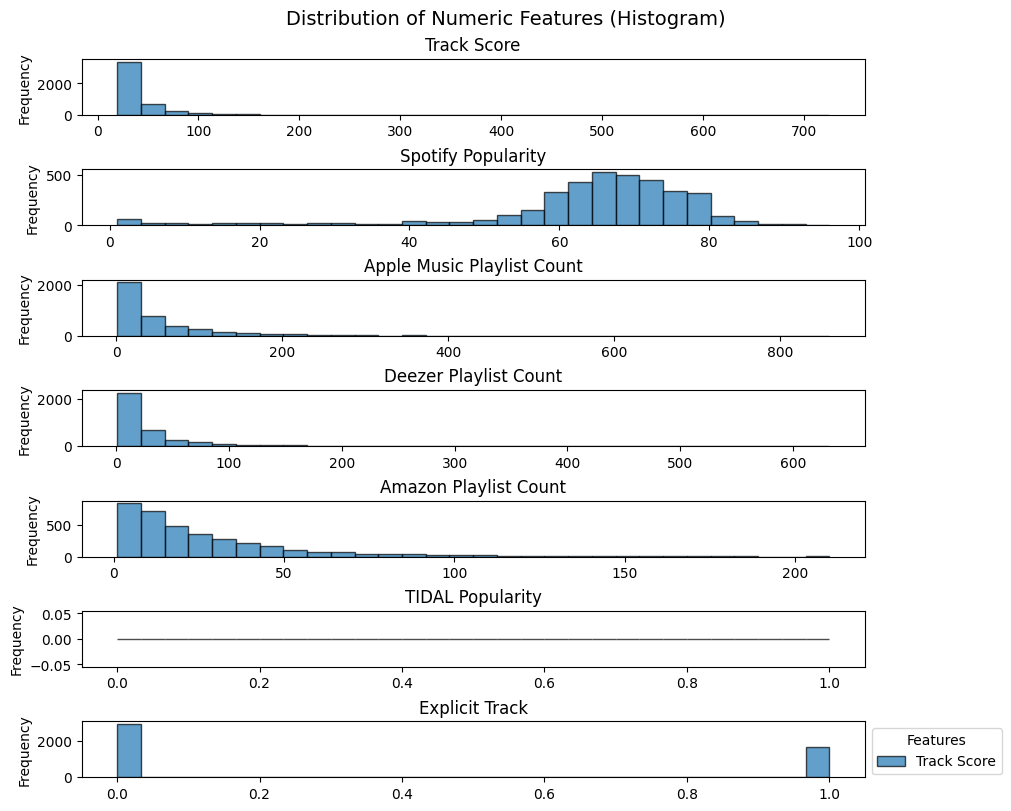

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define file path
file_path = os.path.expanduser("~/Downloads/Most Streamed Spotify Songs 2024.csv")

# Load the dataset with encoding detection
try:
    df = pd.read_csv(file_path, encoding="utf-8")
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding="latin1")  # Try an alternative encoding

# Display basic info
print("Dataset Info:")
df.info()

# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0])

# Display first few rows
print("\nFirst Few Rows:")
display(df.head())

# Get numeric columns
numeric_features = df.select_dtypes(include=['number']).columns

# Create histograms for numeric feature distributions
fig, axes = plt.subplots(nrows=len(numeric_features), ncols=1, figsize=(10, 8), constrained_layout=True)

for ax, col in zip(axes, numeric_features):
    ax.hist(df[col].dropna(), bins=30, edgecolor="black", alpha=0.7)
    ax.set_title(col, fontsize=12)  # Add feature name as the title of each histogram
    ax.set_ylabel("Frequency", fontsize=10)

# Add a legend to the last subplot
axes[-1].legend(numeric_features, loc='upper left', bbox_to_anchor=(1, 1), fontsize=10, title="Features")

# Set the main title
fig.suptitle("Distribution of Numeric Features (Histogram)", fontsize=14)

plt.show()


In [ ]:

STEP 2


Any NaN values left? 0


,Track Score,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,Explicit Track,Cluster
0,17.736468,1.938396,2.316064,0.611749,3.886088,-0.748232,1.398126
1,13.078918,1.938396,1.988172,0.714775,3.754581,1.336484,1.398126
2,12.884313,1.938396,2.017981,2.136534,6.428563,-0.748232,1.398126
3,10.458235,1.462272,5.058435,4.774000,8.094322,-0.748232,1.398126
4,9.897773,1.666325,1.898747,1.023853,3.491566,1.336484,1.398126


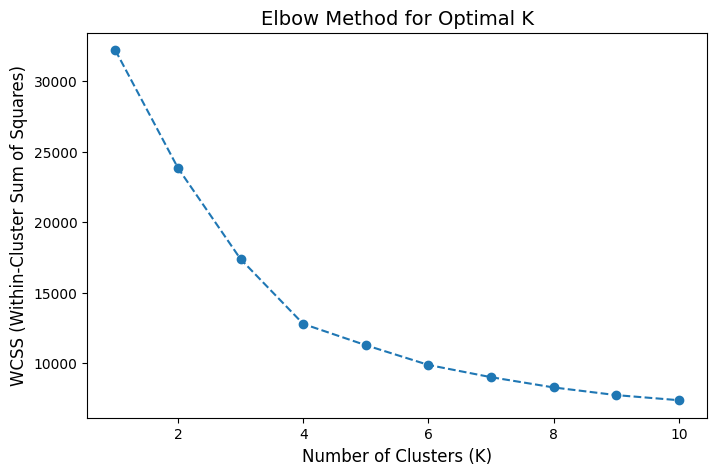

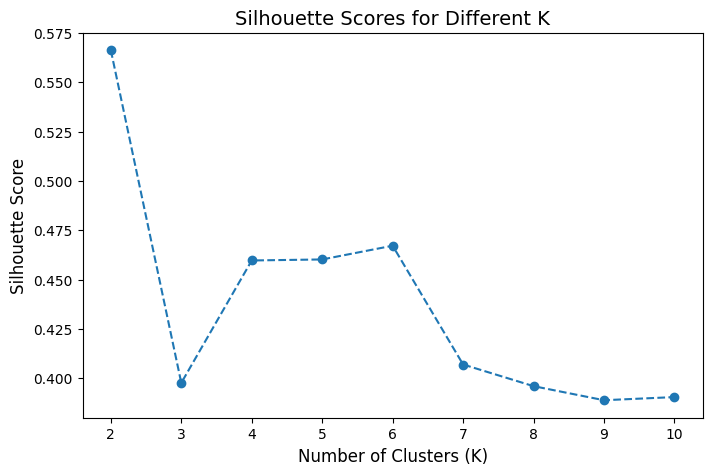

Cluster Distribution:
Cluster
0    2470
1    1500
2     327
3     303
Name: count, dtype: int64

Sample of Clustered Songs:


,Cluster
0,2
1,2
2,2
3,2
4,2
5,2
6,2
7,2
8,2
9,2


Cluster Profiles:


,Track Score,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,Explicit Track
Cluster,,,,,,
0,-0.168388,0.171116,-0.180716,-0.135863,-0.144798,-0.748232
1,-0.091422,0.161839,-0.215625,-0.275954,-0.256990,1.336484
2,1.699512,0.832642,2.564459,2.420194,2.391877,-0.129830
3,-0.008876,-3.094687,-0.226970,-0.138257,-0.128736,-0.376698


In [12]:
# ==============================
# STEP 2.1: Preprocessing for K-Means
# ==============================

from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Select only numeric columns
df_kmeans = df.select_dtypes(include=['number']).copy()

# Fill missing values with column means
df_kmeans.fillna(df_kmeans.mean(), inplace=True)

# Drop columns where all values are NaN (ensuring we don’t lose all data)
df_kmeans.dropna(axis=1, how='all', inplace=True)

# Check if we still have rows left
if df_kmeans.shape[0] == 0:
    raise ValueError("Dataset is empty after preprocessing. Check data source!")

# Standardize the features (K-Means works best with normalized data)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_kmeans)

# Convert back to DataFrame for readability
df_scaled = pd.DataFrame(df_scaled, columns=df_kmeans.columns)

# Final check: Ensure no NaNs are left
print("Any NaN values left?", df_scaled.isnull().sum().sum())

# Display first few rows
display(df_scaled.head())

# ==============================
# STEP 2.2: Elbow Method to Determine Optimal K
# ==============================

wcss = []  # Within-cluster sum of squares
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)", fontsize=12)
plt.ylabel("WCSS (Within-Cluster Sum of Squares)", fontsize=12)
plt.title("Elbow Method for Optimal K", fontsize=14)
plt.show()


# ==============================
# STEP 2.3: Silhouette Score Analysis
# ==============================

silhouette_scores = []

for k in range(2, 11):  # Start from 2 clusters (Silhouette is not defined for k=1)
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, labels))

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (K)", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.title("Silhouette Scores for Different K", fontsize=14)
plt.show()


# ==============================
# STEP 2.4: Apply K-Means with Optimal K
# ==============================

# Choose the best K based on the elbow method and silhouette scores
optimal_k = 4  # Change this after analyzing the previous plots

# Apply K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# Assign clusters to the original dataset
df['Cluster'] = df_scaled['Cluster']

# Display cluster counts
print("Cluster Distribution:")
print(df['Cluster'].value_counts())

# Show a few clustered songs
print("\nSample of Clustered Songs:")
display(df[['Cluster']].head(10))


# ==============================
# STEP 2.5: Cluster Profiling
# ==============================

# Compute mean feature values per cluster
cluster_profiles = df_scaled.groupby('Cluster').mean()

# Show the cluster profiles
print("Cluster Profiles:")
display(cluster_profiles)



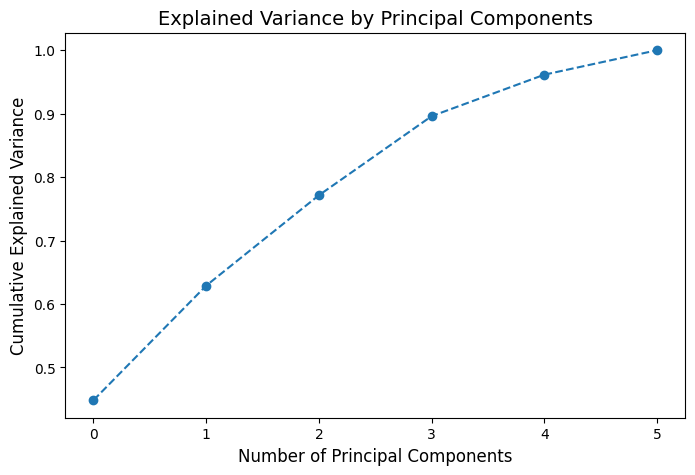

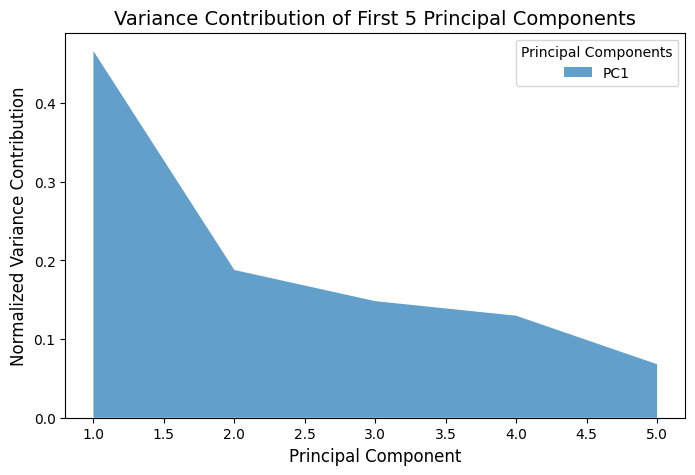

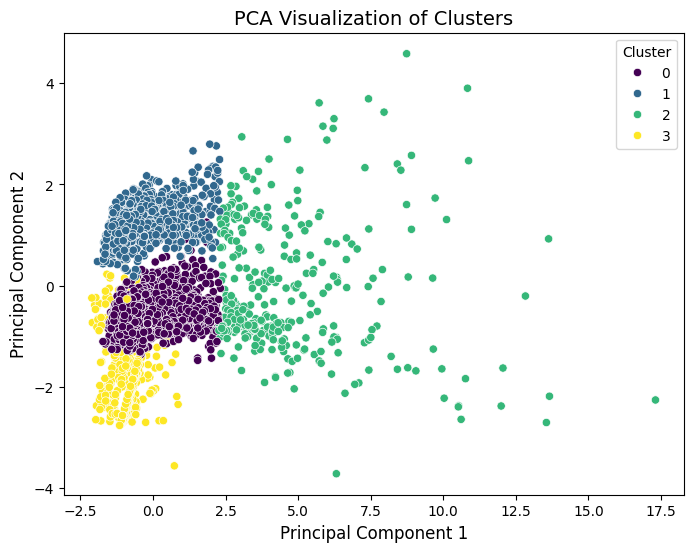

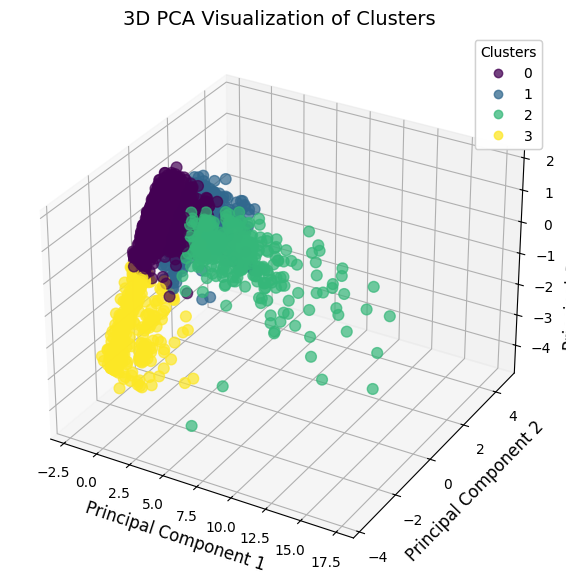

In [33]:
from sklearn.decomposition import PCA
import numpy as np

# ==============================
# STEP 3.1: Preprocessing for PCA
# ==============================

# Select only numeric columns (excluding the 'Cluster' column)
df_pca = df_scaled.drop(columns=['Cluster'])

# Ensure no missing values
df_pca.fillna(df_pca.mean(), inplace=True)
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# ==============================
# STEP 3.2: Perform PCA
# ==============================

# Initialize PCA (keep all components initially)
pca = PCA()
pca_components = pca.fit_transform(df_pca)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# ==============================
# CHART 1: Explained Variance by Principal Component
# ==============================

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel("Number of Principal Components", fontsize=12)
plt.ylabel("Cumulative Explained Variance", fontsize=12)
plt.title("Explained Variance by Principal Components", fontsize=14)
plt.show()

# ==============================
# CHART 2: Variance Contribution of First 5 Principal Components
# ==============================

import numpy as np
import matplotlib.pyplot as plt

# Select the first 5 PCs (or all available if fewer exist)
num_pcs = min(5, len(explained_variance))
pc_labels = [f"PC{i+1}" for i in range(num_pcs)]
variance_contributions = explained_variance[:num_pcs]

# Normalize variance contributions for better visualization
variance_contributions /= variance_contributions.sum()

# Create a stacked area chart
plt.figure(figsize=(8, 5))

# ✅ Fix: Explicitly plot each PC to ensure visibility
plt.stackplot(range(1, num_pcs + 1), variance_contributions, labels=pc_labels, alpha=0.7)

# Labels and legend
plt.xlabel("Principal Component", fontsize=12)
plt.ylabel("Normalized Variance Contribution", fontsize=12)
plt.title("Variance Contribution of First 5 Principal Components", fontsize=14)
plt.legend(title="Principal Components", loc="upper right")

plt.show()

# ==============================
# STEP 3.3: Perform PCA with at Least 3 Components
# ==============================

from sklearn.decomposition import PCA

# Ensure at least 3 principal components, but do not exceed the number of available features
optimal_components = max(3, df_pca.shape[1])
pca = PCA(n_components=optimal_components)
df_pca_reduced = pca.fit_transform(df_pca)

# Convert to DataFrame
df_pca_reduced = pd.DataFrame(df_pca_reduced, 
                              columns=[f"PC{i+1}" for i in range(optimal_components)])

# ✅ Reattach the 'Cluster' column from the original clustering results
df_pca_reduced['Cluster'] = df_scaled['Cluster'].values  # Ensure it matches row indices

# ==============================
# STEP 3.4: Visualize PCA Clusters
# ==============================

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca_reduced["PC1"], y=df_pca_reduced["PC2"], hue=df_pca_reduced["Cluster"], palette="viridis")
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.title("PCA Visualization of Clusters", fontsize=14)
plt.legend(title="Cluster")
plt.show()

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# ==============================
# STEP 3.5: 3D Visualization of Clusters
# ==============================

# Re-run PCA with 3 components for 3D visualization
pca_3d = PCA(n_components=3)
df_pca_3d = pca_3d.fit_transform(df_pca)

# Convert to DataFrame
df_pca_3d = pd.DataFrame(df_pca_3d, columns=["PC1", "PC2", "PC3"])
df_pca_3d['Cluster'] = df_scaled['Cluster']

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca_3d['PC1'], df_pca_3d['PC2'], df_pca_3d['PC3'], 
                     c=df_pca_3d['Cluster'], cmap='viridis', s=60, alpha=0.7)

# Labeling the axes
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)
ax.set_title('3D PCA Visualization of Clusters', fontsize=14)

# Adding a legend
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()


In [34]:
# ==============================
# STEP 4.1: Cluster Profiles
# ==============================

# Displaying Cluster Profiles with a title
print("CLUSTER PROFILES for Most Streamed Spotify Songs 2024.csv:")
display(cluster_profiles)

# ==============================
# STEP 4.2: Top Songs Per Cluster
# ==============================
# Ensure 'Track' column exists in your dataset
if 'Track' in df.columns:
    top_songs_per_cluster = df.groupby('Cluster').head(5)[['Track', 'Cluster']]
    print("\nTop Songs Per Cluster:")
    display(top_songs_per_cluster)
else:
    print("\n'Cluster' or 'Track' column not found in the dataset. Check your column names.")

# ==============================
# STEP 4.4: PCA Loadings (Feature Importance)
# ==============================

import pandas as pd

# Get the actual number of principal components created
num_pcs_available = len(pca.components_)

# Ensure we display the available PCs (at least 2)
num_pcs_to_display = max(2, num_pcs_available)  # Ensures at least 2 PCs are displayed

# Create PCA Loadings DataFrame
pca_loadings = pd.DataFrame(pca.components_[:num_pcs_to_display], 
                            columns=df_pca.columns, 
                            index=[f'PC{i+1}' for i in range(num_pcs_to_display)])

# Show PCA component loadings for the available PCs
print(f"\nPCA Component Loadings (First {num_pcs_to_display} Principal Components):")
display(pca_loadings)


CLUSTER PROFILES for Most Streamed Spotify Songs 2024.csv:


,Track Score,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,Explicit Track
Cluster,,,,,,
0,-0.168388,0.171116,-0.180716,-0.135863,-0.144798,-0.748232
1,-0.091422,0.161839,-0.215625,-0.275954,-0.256990,1.336484
2,1.699512,0.832642,2.564459,2.420194,2.391877,-0.129830
3,-0.008876,-3.094687,-0.226970,-0.138257,-0.128736,-0.376698



Top Songs Per Cluster:


,Track,Cluster
0,MILLION DOLLAR BABY,2
1,Not Like Us,2
2,i like the way you kiss me,2
3,Flowers,2
4,Houdini,2
11,The Door,1
14,bathroom floor,3
22,Danza Kuduro - Cover,1
25,Beat Automotivo Tan Tan Tan Viral,3
27,Baby Shark,0



PCA Component Loadings (First 6 Principal Components):


,Track Score,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,Explicit Track
PC1,0.384742,0.227079,0.533744,0.501423,0.510966,-0.054909
PC2,0.225408,0.473123,-0.073750,-0.189582,-0.028086,0.826545
PC3,-0.266453,0.849886,-0.064895,-0.041360,-0.115224,-0.433011
PC4,0.749146,0.033271,-0.340875,-0.422291,0.154491,-0.345370
PC5,-0.410536,-0.019694,-0.082607,-0.407734,0.809640,0.049851
PC6,0.020218,-0.028095,0.763182,-0.605265,-0.213225,-0.067409


In [25]:
 CLUSTER PROFILES for Most Streamed Spotify Songs 2024.csv:
    They are better suited for popularity metrics.
    From here, however, we can take n number of songs (preferably starting from the top) and create a new model grouping 
them into genre type, in order to better understand the data.
    Some data features we will use will include tempo, key of song, length, volume, release date, Y/N additional artist 
feature, dancability, energy/tone. 
    I intend to disocover the similarites in the traits of songs grouped in each cluster.

PC1 has a higher value in Amazon, Deezer, and Apple Music PLaylists. 

PC2 seperates explicit vs non explicit songs, and since there is also a high spotify popularity value, it may indicate 
that spotify favors explictness as a popularity measure. 

PC3 is associated Primarily with Spotify Popularity, but holds less significance in defining clusters than PC1 and PC2.

PC4-6 hold much less significance than 3, so I considered it wise for me to exclude them in determiining clusters.

CLUSTER PROFILES (Cont.)
    Additionally, it seems that Cluster 1 and 2 retain the most valueable information over Clusters 0 and 4.
Attention to the Cluster Profiles chart seen twice so far. 
    Cluster 1 has significant values in the Explicit column, and minor significance in spotify popularity, while Cluster 
2 holds value in the Spotify Popularity, Apple Music Playlist Count, Deezer Playlist Count, Amazon Playlist Count.

    Something worth noting about the Clusters in the Shilouette Tables in Step 2: We can see the highest Shilouette
scores at only 2 clusters. However, following the Elbow Method led us to 4. 2/4 Clusters hold results more important 
than the others. Lower Within Cluster Sum of Squares (WCSS) means clusters are more compact (better fit). The curve will 
start steep and flatten out at some point. This is where adding more clusters stops significantly improving WCSS.

SyntaxError: invalid decimal literal (84946280.py, line 1)

In [1]:
    For Part 2, I can potentially create a model to reccomend songs in a similar key based on the following chart I 
discovered: Music Key Characteristics Chart on next tab.

I have also gathered the top 100 songs information. (Including duplicates, and N/A). In actuality it is about 90 songs, 
but that is enough just for the experiment. 

SyntaxError: invalid syntax (3138864161.py, line 1)